In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def get_corpus(parent_folder):
    """retourne corpus des textes contenus dans parent_folder sous forme de liste de string"""
    corpus = []
    # iterate over all the files in directory 'parent_folder'
    for file_name in os.listdir(parent_folder):
        if file_name.endswith(".txt"):
            path = parent_folder+"/"+file_name
            fichier = open(path, "r")
            lignes = fichier.readlines()
            fichier.close()
            
            texte = ""
            for ligne in lignes :
                if ligne[0] not in "0123456789":
                    texte += ligne
            corpus.append(texte)
        
        else:
            current_path = "".join((parent_folder, "/", file_name))
            if os.path.isdir(current_path):
                # if we're checking a sub-directory, recall this method
                scan_folder(current_path)
    
    return corpus

In [3]:
corpus = get_corpus("data/1___Lost/01")
vectorizer = CountVectorizer(stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus)
dico = vectorizer.get_feature_names()
print(len(dico))

4920


In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
dico1 = vectorizer.get_feature_names()
print("On a enleve "+str(len(dico1)-len(dico))+" stopwords.")

On a enleve 138 stopwords.


In [5]:
def somme_lignes(tab):
    """somme les lignes d'un tableau"""
    res = []
    for i in range(len(tab[0])):
        res.append(0)
    for k in range(len(tab)):
        for i in range(len(tab[0])):
                res[i] += tab[k][i]
    return np.array(res)

In [6]:
def df_n_plus_presents(n, corpus):
    """dataFrame des n mots les plus present dans le corpus"""
    vectorizer = CountVectorizer(stop_words = stopwords.words('english'))
    X = vectorizer.fit_transform(corpus)
    dico = vectorizer.get_feature_names()
    nb_occ = somme_lignes(X.toarray())
    
    ind = np.argpartition(nb_occ, -n)[-n:]
    ind = ind[np.argsort(-nb_occ[ind])]
    words = [dico[i] for i in ind]

    words_count = []
    i = 0
    for i in range(len(words)):
        words_count.append(nb_occ[ind[i]])

    df = pd.DataFrame(np.column_stack([words, words_count]), columns=['Word', 'Nb_occ'])
    df.Nb_occ=pd.to_numeric(df.Nb_occ)
    
    return df   

In [12]:
def get_hist(df, x_axis, y_axis, titre, colour, font_size=None):
    hist = df.plot.bar(x=x_axis, y=y_axis, color=colour, title =titre, fontsize = font_size, edgecolor = "none").get_figure()
    path_fig = "img/"+titre+'.png'
    hist.savefig(path_fig,  bbox_inches="tight")

,Word,Nb_occ
0,know,566
1,get,416
2,yeah,338
3,right,325
4,okay,293
5,gonna,292
6,one,288
7,think,269
8,go,267
9,come,266


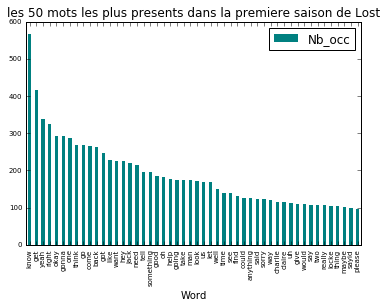

In [13]:
n = 50
df = df_n_plus_presents(n, corpus)
titre = "les "+str(n)+" mots les plus presents dans la premiere saison de Lost"
get_hist(df, "Word", "Nb_occ", titre, "teal", 7)
df